# Introdução à Visão Computacional
Autor: Prof. Dr. Raphaell Maciel de Sousa

Grupo de Pesquisa em Controle, Automação e Robótica (GPCAR)

## O que é processamento digital de imagem?

De acordo com Gonzalez e Woods 2014, uma imagem pode ser definida como uma função bidimensional, f(x,y), de modo que x e y são coordenadas espaciais e a amplitude de f é a intensidade ou nível de cinza da imagem neste ponto. Uma imagem digital corresponde á uma quantidade finita de coordenadas x e y e suas respectivas intensidades.

## O que é visão computacional?

Nesta ciência, são utilizados vários algoritmos para que os computadores possam "compreender" imagens digitais.

## Primeiros passos (Instalando os pacotes)

* Instalar o miniconda 3

https://docs.conda.io/en/latest/miniconda.html

* Instalar o environment

```conda env create -f environment.yml```

* Carregar o ambiente

```conda activate carnd```

* Inicie o jupyter notebook (no bash):

```jupyter notebook```

## Some code!!

Vamos carregar uma imagem para nossos primeiros testes

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


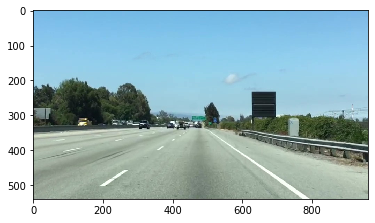

In [2]:
# Read in the image and print out some stats
image = mpimg.imread('images/test.jpg') 
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
# Note: always make a copy rather than simply using "="
color_select = np.copy(image)

plt.imshow(color_select)

## OpenCv uma biblioteca poderosa para visão computacional!!

https://opencv.org/

In [3]:
import cv2

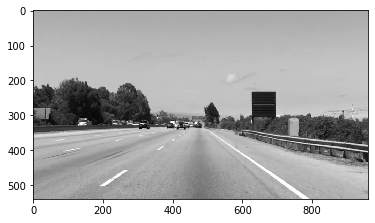

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

## Canny Edge Detection

Algoritmo para detecção de bordas que foi proposto por John F. Canny em 1986. Os passos para a utilização deste algoritmo são:

    1. Apply Gaussian filter to smooth the image in order to remove the noise
    2. Find the intensity gradients of the image
    3. Apply non-maximum suppression to get rid of spurious response to edge detection
    4. Apply double threshold to determine potential edges
    5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong ed

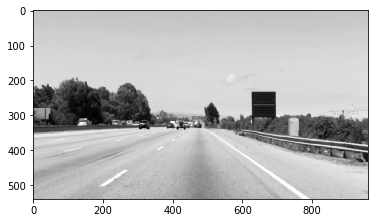

In [5]:
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Display the image
plt.imshow(blur_gray, cmap='Greys_r')

Tente ajustar os limites do low_threshold e high_threshold 

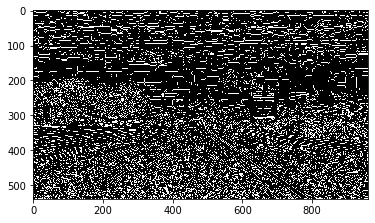

In [6]:
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 1 #type a positive value
high_threshold = 5 #type a positive value
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

## Atividade: baixe uma imagem com extensão ".jpg" do google e plote em RGB e tons de cinza

## Isolando canais em diferentes espaços de cores

In [7]:
color_select_R = color_select[:,:,0]
color_select_G = color_select[:,:,1]
color_select_B = color_select[:,:,2]
color_select_HSV = cv2.cvtColor(color_select, cv2.COLOR_RGB2HSV)
color_select_H = color_select_HSV[:,:,0]
color_select_S = color_select_HSV[:,:,1]
color_select_V = color_select_HSV[:,:,2]
color_select_HLS = cv2.cvtColor(color_select, cv2.COLOR_RGB2HLS)
color_select_HLS_H = color_select_HLS[:,:,0]
color_select_HLS_L = color_select_HLS[:,:,1]
color_select_HLS_S = color_select_HLS[:,:,2]

Text(0.5, 1.0, 'HLS S-Channel')

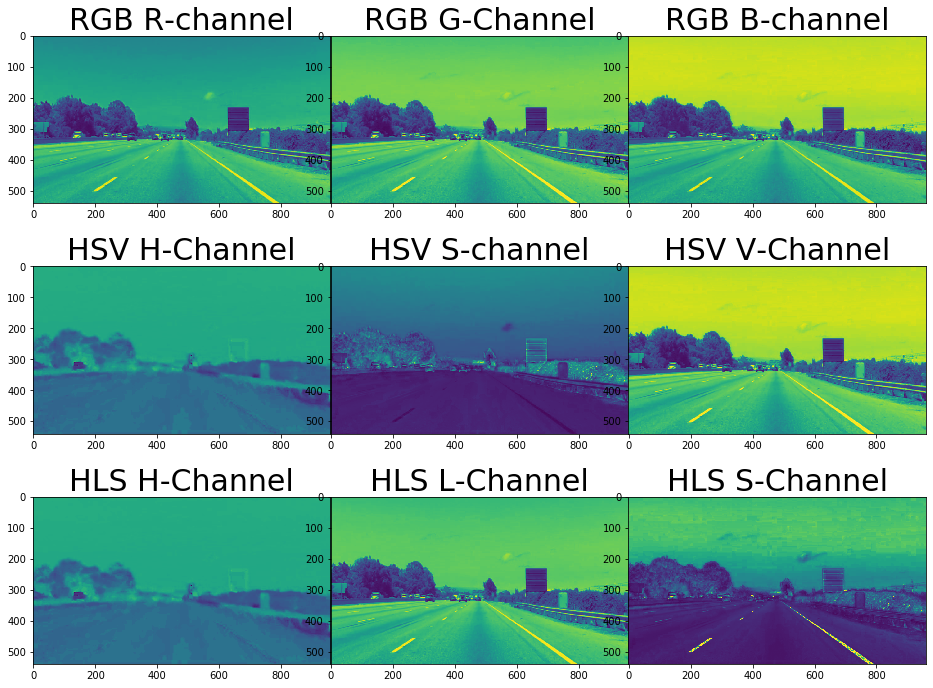

In [8]:
fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

axs[0].imshow(color_select_R)
axs[0].set_title('RGB R-channel', fontsize=30)
axs[1].imshow(color_select_G)
axs[1].set_title('RGB G-Channel', fontsize=30)
axs[2].imshow(color_select_B)
axs[2].set_title('RGB B-channel', fontsize=30)
axs[3].imshow(color_select_H)
axs[3].set_title('HSV H-Channel', fontsize=30)
axs[4].imshow(color_select_S)
axs[4].set_title('HSV S-channel', fontsize=30)
axs[5].imshow(color_select_V)
axs[5].set_title('HSV V-Channel', fontsize=30)
axs[6].imshow(color_select_HLS_H)
axs[6].set_title('HLS H-Channel', fontsize=30)
axs[7].imshow(color_select_HLS_L)
axs[7].set_title('HLS L-Channel', fontsize=30)
axs[8].imshow(color_select_HLS_S)
axs[8].set_title('HLS S-Channel', fontsize=30)

### Para pensar...

Qual ou quais canais/espaço de cores foi possível obter os melhores resultados para detecção das linhas da pista? Quais canais/espaço de cores não deveriam ser utilizados?

## Identifique a bola amarela

1° Carregue as bibliotecas necessárias

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

2º Carregue a imagem

This image is:  <class 'numpy.ndarray'> with dimensions: (640, 960, 3)


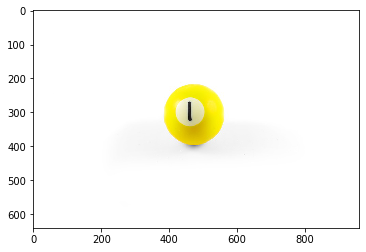

In [10]:
bolaAmarela = mpimg.imread('images/bolaAmarela.jpg')
print('This image is: ',type(bolaAmarela), 
         'with dimensions:', bolaAmarela.shape)

# Grab the x and y size and make a copy of the image
ysize = bolaAmarela.shape[0]
xsize = bolaAmarela.shape[1]

# Note: always make a copy rather than simply using "="
color_select = np.copy(bolaAmarela)

plt.imshow(color_select)

3º Aplique as transformações de espaço de cores e isole os canais. Avalie qual a melhor estratégia para idetificar a bola.

In [11]:
color_select_R = color_select[:,:,0]
color_select_G = color_select[:,:,1]
color_select_B = color_select[:,:,2]
color_select_HSV = cv2.cvtColor(color_select, cv2.COLOR_RGB2HSV)
color_select_H = color_select_HSV[:,:,0]
color_select_S = color_select_HSV[:,:,1]
color_select_V = color_select_HSV[:,:,2]
color_select_HLS = cv2.cvtColor(color_select, cv2.COLOR_RGB2HLS)
color_select_HLS_H = color_select_HLS[:,:,0]
color_select_HLS_L = color_select_HLS[:,:,1]
color_select_HLS_S = color_select_HLS[:,:,2]

Text(0.5, 1.0, 'HLS S-Channel')

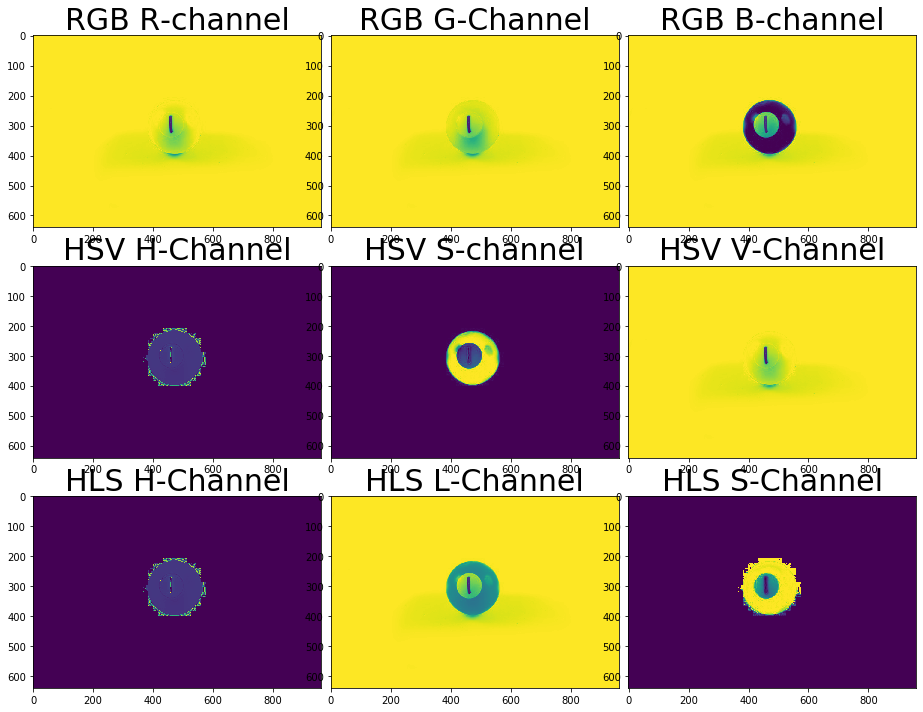

In [12]:
fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

axs[0].imshow(color_select_R)
axs[0].set_title('RGB R-channel', fontsize=30)
axs[1].imshow(color_select_G)
axs[1].set_title('RGB G-Channel', fontsize=30)
axs[2].imshow(color_select_B)
axs[2].set_title('RGB B-channel', fontsize=30)
axs[3].imshow(color_select_H)
axs[3].set_title('HSV H-Channel', fontsize=30)
axs[4].imshow(color_select_S)
axs[4].set_title('HSV S-channel', fontsize=30)
axs[5].imshow(color_select_V)
axs[5].set_title('HSV V-Channel', fontsize=30)
axs[6].imshow(color_select_HLS_H)
axs[6].set_title('HLS H-Channel', fontsize=30)
axs[7].imshow(color_select_HLS_L)
axs[7].set_title('HLS L-Channel', fontsize=30)
axs[8].imshow(color_select_HLS_S)
axs[8].set_title('HLS S-Channel', fontsize=30)

This image is:  <class 'numpy.ndarray'> with dimensions: (640, 960)


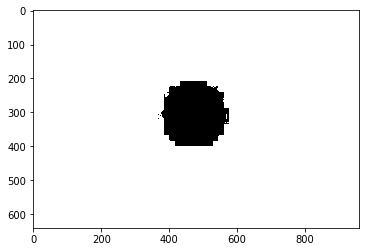

In [13]:
binary_output = np.zeros_like(color_select_S)
binary_output[(color_select_S <= 0) | (color_select_HLS_S <= 0)] = 1

kernel_size = 5
blur_gray = cv2.GaussianBlur(binary_output,(kernel_size, kernel_size), 0)

plt.imshow(blur_gray, cmap='gray')

print('This image is: ',type(blur_gray), 
         'with dimensions:', blur_gray.shape)

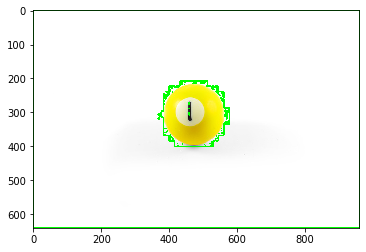

In [14]:
(thresh, im_bw) = cv2.threshold(binary_output, 0, 1, 0)
contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(bolaAmarela, contours, -1, (0,255,0), 3)

plt.imshow(bolaAmarela)

In [15]:
def draw(cnts, img, area):
    x = 0
    y = 0 
    w = 0
    h = 0
    for c in cnts:
        if cv2.contourArea(c) < area:
            continue
        (x, y, w, h) = cv2.boundingRect(c) 

        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)
  
    return img, x, y, w, h

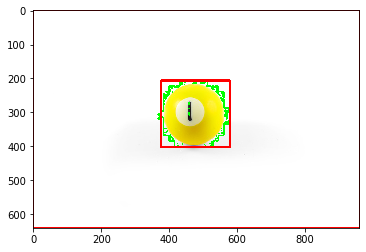

In [16]:
frame, x, y, w, h = draw(contours, bolaAmarela, 1000)

plt.imshow(frame)